In [2]:
!pip install citipy

In [2]:
# Dependencies and Setup, time is to delay query for api, since api only supplies so much data at one time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params={
    "appid":api_key,
    "units":"imperial"
}

In [6]:
lat=[]
temp=[]
wind=[]
clouds=[]
humidity=[]
Date=[]
country=[]

for city in cities:
    try:
        time.sleep(5)
        params["q"]=city
        response = requests.get(url, params=params).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        Date.append(response['dt'])
        country.append(response['sys']['country'])
    except:
        lat.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        wind.append(np.nan)
        clouds.append(np.nan)
        Date.append(np.nan)
        country.append(np.nan)
        

In [9]:
weather_city={
    "lat":lat,
    "city":cities,
    "temp_max":temp,
    "humidity":humidity,
    "wind":wind,
    "cloudiness":clouds,
    "Date":Date,
    "country":country
}
weather_df=pd.DataFrame(weather_city)
weather_df.head()

,lat,city,temp_max,humidity,wind,cloudiness,Date,country
0,39.42,chara,66.2,68.0,0.92,20.0,1.567474e+09,GR
1,44.14,shetpe,62.9,57.0,1.97,60.0,1.567474e+09,KZ
2,NaN,amderma,NaN,NaN,NaN,NaN,NaN,NaN
3,-33.86,esperance,55.4,82.0,14.99,5.0,1.567474e+09,AU
4,-53.16,punta arenas,39.2,69.0,18.34,0.0,1.567474e+09,CL


In [23]:
weather_df.to_csv("weather_df.csv")

In [4]:
weather_df=pd.read_csv("weather_df.csv")

In [5]:
weather_df["Date"]=pd.to_datetime(weather_df["Date"],unit="s")

In [6]:
weather_df.head()

,Unnamed: 0,lat,city,temp_max,humidity,wind,cloudiness,Date,country
0,0,39.42,chara,66.2,68.0,0.92,20.0,2019-09-03 01:29:48,GR
1,1,44.14,shetpe,62.9,57.0,1.97,60.0,2019-09-03 01:29:54,KZ
2,2,NaN,amderma,NaN,NaN,NaN,NaN,NaT,NaN
3,3,-33.86,esperance,55.4,82.0,14.99,5.0,2019-09-03 01:27:35,AU
4,4,-53.16,punta arenas,39.2,69.0,18.34,0.0,2019-09-03 01:30:09,CL


In [7]:
weather_df.dropna()

,Unnamed: 0,lat,city,temp_max,humidity,wind,cloudiness,Date,country
0,0,39.42,chara,66.20,68.0,0.92,20.0,2019-09-03 01:29:48,GR
1,1,44.14,shetpe,62.90,57.0,1.97,60.0,2019-09-03 01:29:54,KZ
3,3,-33.86,esperance,55.40,82.0,14.99,5.0,2019-09-03 01:27:35,AU
4,4,-53.16,punta arenas,39.20,69.0,18.34,0.0,2019-09-03 01:30:09,CL
5,5,59.70,nikolskoye,63.00,82.0,8.95,90.0,2019-09-03 01:26:22,RU
6,6,-20.34,bambous virieux,70.00,82.0,5.82,75.0,2019-09-03 01:30:20,MU
7,7,53.23,lincoln,60.01,87.0,8.05,0.0,2019-09-03 01:30:09,GB
8,8,45.76,mandalgovi,75.23,31.0,15.68,0.0,2019-09-03 01:30:30,MN
9,9,-42.78,new norfolk,62.01,44.0,9.17,75.0,2019-09-03 01:30:35,AU
10,10,69.44,tuktoyaktuk,48.20,57.0,17.22,20.0,2019-09-03 01:26:23,CA


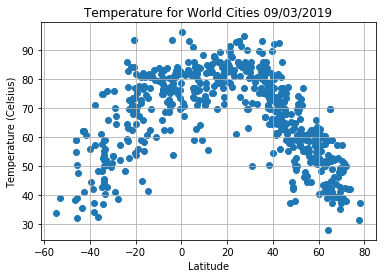

In [8]:
#Latitude vs. Temperature Plot
plt.scatter(weather_df["lat"],weather_df["temp_max"],marker="o")
plt.title("Temperature for World Cities 09/03/2019")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureWorldCities.png")

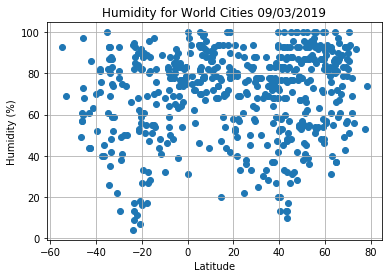

In [13]:
#Latitude vs. Humidity Plot
plt.scatter(weather_df["lat"],weather_df["humidity"],marker="o")
plt.title("Humidity for World Cities 09/03/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityWorldCities.png")

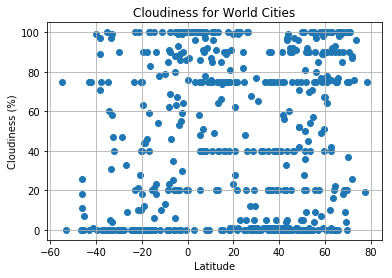

In [14]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_df["lat"],weather_df["cloudiness"],marker="o")
plt.title("Cloudiness for World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CloudinessWorldCities.png")

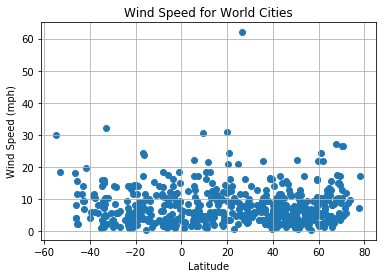

In [15]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_df["lat"],weather_df["wind"],marker="o")
plt.title("Wind Speed for World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindWorldCities.png")

Observable trends:
1. Max temp is higher at cities situated around the equator.
2. Cloudiness seems to have several cities grouped by %, data gathered seems to demonstrate that there possibly isn't a good standard for messing cloudiness (most responses are roughly around 25, 50, 75, and 100).
3. Wind speed for all the world cities is relativity grouped together, there is one outlier at roughly 64 mph.
4. Humidity of the world cities seems to be very high, this may indicate that it maybe a predominately rainy season for the majority of the world cities included.